# Plot multi-level pie chart
- this notebook creates a pie chart where you can modify the height of each slice

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [16]:
def get_start(current_width, previous_width, previous_step):
    """
    Returns the appropriate start offset based on 
    """
    circle = np.pi*2 # 1 radian = 6.28
    if previous_width is None:
        previous_width = 0
    stepper = circle * 0.05  # okay honestly don't really know why this needs to be 0.05
    return previous_step + stepper * (current_width*10 + previous_width*10) 

def sunburst(widths, heights, colors):
    """
    Make a sunburst pie chart (pie chart with different heights for each pie)
    """
    try:
        assert sum(widths) == 1  # make sure all slices equal 1
    except AssertionError:
        print("Pie slices do not equal 1! Pie chart may be incomplete")

    previous_step = 0
    previous_width = None

    starts = []
    for w in range(len(widths)):
        starts.append(get_start(widths[w], previous_width, previous_step))
        previous_step = get_start(widths[w], previous_width, previous_step)
        previous_width = widths[w]
    
    circle = np.pi*2 # 1 radian = 6.28
    widths = [circle*x for x in widths]
    ax = plt.subplot(111, projection='polar')
    bars = ax.bar(starts, radii, widths, bottom=0.0, color=colors)  # change bottom to 1 for 'donut' look

    # Use custom colors and opacity
    for r, bar in zip(radii, bars):
        bar.set_alpha(0.5)

    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.show()


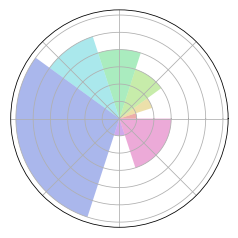

In [17]:
widths = [0.05,0.05,0.1,0.1,0.1,0.3,0.1,0.2]  # aka "percentage of pie"
radii = [1,2,3,4,5,6,1,3]  # aka "height of each slice" 
colors = sns.color_palette("hls", len(widths))

sunburst(widths, radii, colors)